In [50]:
import networkx as nx
import matplotlib.pyplot as plt

from dataclasses import dataclass

In [42]:
def load_graph(path: str) -> nx.Graph:
    with open(path, "r") as file:
        input_text = file.read()

    return parse_graph(input_text)

def parse_graph(text: str):
    lines = text.strip().split('\n')
    
    G = nx.Graph()

    node_labels = list(lines[0].strip().replace(" ", ""))

    if any(label.isdigit() for label in node_labels):
        raise ValueError("Node labels should be letters")

    for id, label in enumerate(node_labels, 1):
        G.add_node(id, label=label)

    for line in lines[1:]:
        edge_definition = list(line.strip().replace(" ", ""))
        if len(edge_definition) != 3:
            raise ValueError("Edge definition should match the format: node1 label node2")
        
        node1, label, node2 = edge_definition
        if not node1.isdigit() or not node2.isdigit():
            raise ValueError("Node identifiers should be integers")
        if not label.isalpha():
            raise ValueError("Edge label should be a letter")
        if node1 == "0" or node2 == "0":
            raise ValueError("Node identifiers should be greater than 0")

        G.add_edge(int(node1), int(node2), label=label)

    return G

path = "examples/graphs/example1.txt"

G = load_graph(path)
print(G.nodes(data=True))
print(G.edges(data=True))

[(1, {'label': 'A'}), (2, {'label': 'B'}), (3, {'label': 'C'}), (4, {'label': 'D'})]
[(1, 2, {'label': 'a'}), (1, 4, {'label': 'd'}), (2, 3, {'label': 'b'}), (3, 4, {'label': 'c'})]


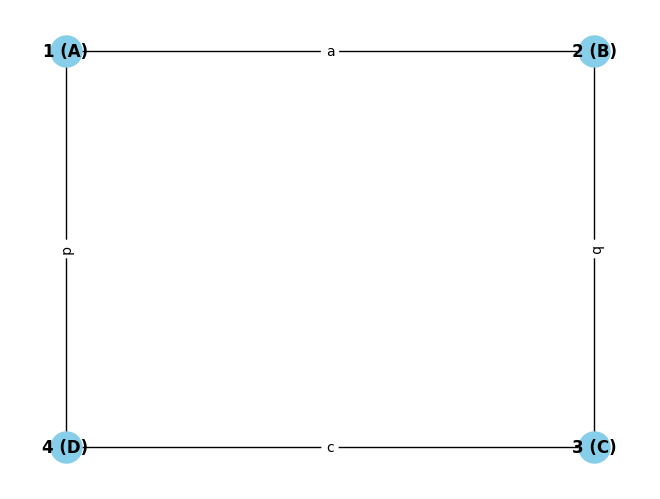

In [ ]:
from typing import Optional

def display_graph_fixed_positions(G: nx.Graph, pos: Optional[dict] = None):
    if not pos:
        pos = nx.spring_layout(G)

    # Create custom labels that show both node ID and label
    labels = {node: f"{node} ({data['label']})" for node, data in G.nodes(data=True)}
    
    # Draw the graph with custom node labels and fixed positions
    nx.draw(G, pos, labels=labels, with_labels=True, font_weight='bold', node_color='skyblue', node_size=500)
    
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.show()

# Define fixed positions for each node
fixed_positions = {
    1: (0, 0),
    2: (1, 0),
    3: (1, -1),
    4: (0, -1)
}

# Assuming G is already loaded using the load_graph function
display_graph_fixed_positions(G, pos=fixed_positions)

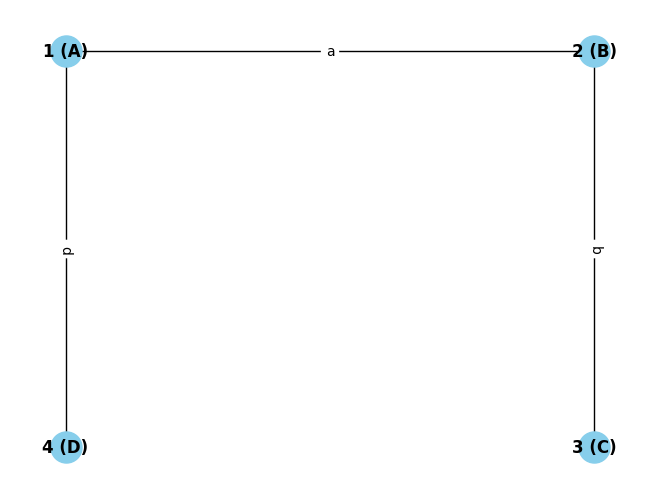

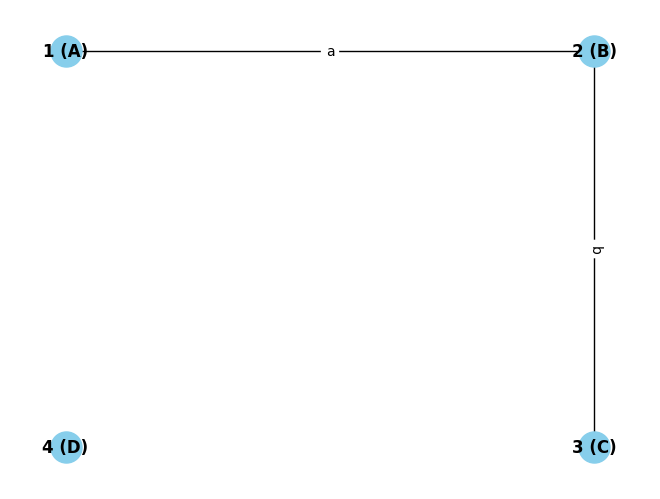

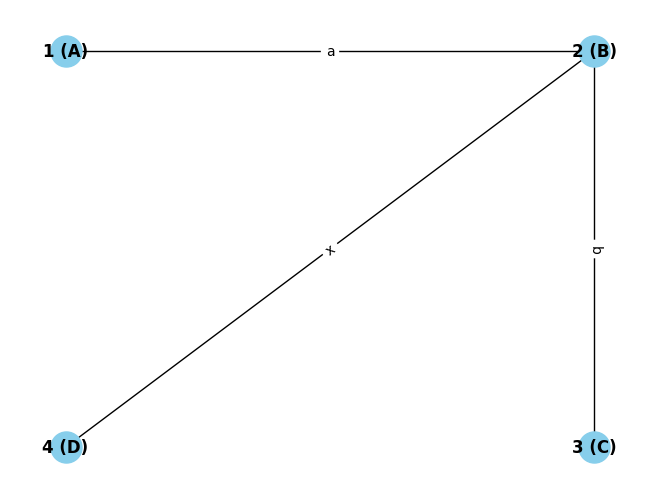

In [55]:
@dataclass
class Production:
    L: nx.Graph
    K: nx.Graph
    R: nx.Graph

def load_production(path: str) -> Production:
    with open(path, "r") as file:
        sections = file.read().strip().split("\n\n")

    if len(sections) != 3:
        raise ValueError("Production file should contain exactly 3 sections for L, K, and R")
    
    L = parse_graph(sections[0])
    K = parse_graph(sections[1])
    R = parse_graph(sections[2])
    
    return Production(L, K, R)

path = "examples/rules/production1.txt"
production = load_production(path)

display_graph_fixed_positions(production.L, pos=fixed_positions)
display_graph_fixed_positions(production.K, pos=fixed_positions)
display_graph_fixed_positions(production.R, pos=fixed_positions)